In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, wilcoxon
import plotly.express as px
import plotly.graph_objects as go
import nbformat

from scipy.stats import ttest_ind, f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib_venn import venn2
import os

In [24]:
fibroblasts_proportion = pd.read_csv("/Users/nikamikhailava/Desktop/batch_merged/batch_merged_bp_res_mid_lvl_ct_ct_fraction.csv")
fibroblasts_proportion["All Stromal"]=1-fibroblasts_proportion["tumor"]
fibroblasts_proportion["All immune"]=1-(fibroblasts_proportion["tumor"]+fibroblasts_proportion["Fibroblasts"])
#create the dataframe with the fibroblasts proportion per patient
fibr_stats=fibroblasts_proportion.groupby("Patient")["Fibroblasts"].agg(["mean", "var"]).reset_index()
fibr_stats.columns = ["Patient", "Fibroblasts_mean", "Fibroblasts_var"]
fibroblasts_proportion

,dcc_filename,tumor,Tcells,Bcells,Fibroblasts,NKcells,Macrophages,Mast cells,DCs,other,...,Segment,Sample,NACT_status,Annotation_cell,Roi.1,Segment_geomx,Patient,Site,All Stromal,All immune
0,DSP-1001660016606-G-A02.dcc,0.476461,0.009487,0.135361,0.231508,0.018543,0.101739,0.001637,0.014749,NaN,...,stroma,S053_post,post,posCD8_posIBA1,1.0,tsi,S053,Omentum,0.523539,0.292031
1,DSP-1001660016606-G-A03.dcc,0.806981,0.013774,0.026948,0.064725,0.012740,0.055951,0.001264,0.009905,NaN,...,tumor,S053_post,post,posCD8_posIBA1,1.0,tsi,S053,Omentum,0.193019,0.128294
2,DSP-1001660016606-G-A04.dcc,0.427201,0.009367,0.105530,0.250796,0.012980,0.169353,NaN,0.018545,NaN,...,stroma,S053_post,post,posCD8_posIBA1,2.0,tsi,S053,Omentum,0.572799,0.322004
3,DSP-1001660016606-G-A05.dcc,0.879490,0.005288,0.010088,0.017065,0.012011,0.058875,0.000828,0.010556,NaN,...,tumor,S053_post,post,posCD8_posIBA1,2.0,tsi,S053,Omentum,0.120510,0.103445
4,DSP-1001660016606-G-A06.dcc,0.450971,0.015423,0.058719,0.276402,0.017479,0.127136,0.000578,0.023020,NaN,...,stroma,S053_post,post,posCD8_posIBA1,3.0,tsi,S053,Omentum,0.549029,0.272627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,DSP-1001660037247-C-D02.dcc,0.454138,0.029929,0.005602,0.278696,0.034023,0.141006,0.005408,0.033737,NaN,...,stroma,S333_pOme,pre,CD8_CD11_Iba1,NaN,tsi,S333,Omentum,0.545862,0.267166
500,DSP-1001660037247-C-D03.dcc,0.852079,0.020000,0.002815,0.012367,0.022574,0.058218,0.002226,0.018547,NaN,...,tumor,S333_pOme,pre,CD8_CD11_Iba1,NaN,tsi,S333,Omentum,0.147921,0.135554
501,DSP-1001660037247-C-D04.dcc,0.591251,0.026897,0.007785,0.179210,0.033338,0.117589,0.004315,0.025071,NaN,...,stroma,S333_pOme,pre,CD8_CD11_Iba1,NaN,tsi,S333,Omentum,0.408749,0.229539
502,DSP-1001660037247-C-D05.dcc,0.887916,0.018637,0.004146,0.006150,0.017441,0.039304,0.001546,0.014483,0.001521,...,tumor,S333_pOme,pre,CD8_CD11_Iba1,NaN,tsi,S333,Omentum,0.112084,0.105933


In [25]:
geomx_metadata_modified = pd.read_csv("/Users/nikamikhailava/Desktop/batch_merged/batch_merged_geomx_metadata.csv") 
geomx_metadata_modified.shape

(504, 20)

In [4]:
segment_counts = geomx_metadata_modified.groupby(['Sample', 'Segment']).size().unstack(fill_value=0)
segment_counts

Segment,stroma,tumor
Sample,,
S015_post,10,10
S015_pre,9,7
S027_post,9,8
S027_pre,11,11
S032_post,10,10
S032_pre,10,10
S053_post,11,11
S057_post,10,10
S065_post,10,10


/var/folders/5f/jg_zhw0n3xl1tf79w0wk705r0000gn/T/ipykernel_2793/1404235275.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sample", y="mean", data=stromal_stats_sample,palette="flare",alpha=0.7)


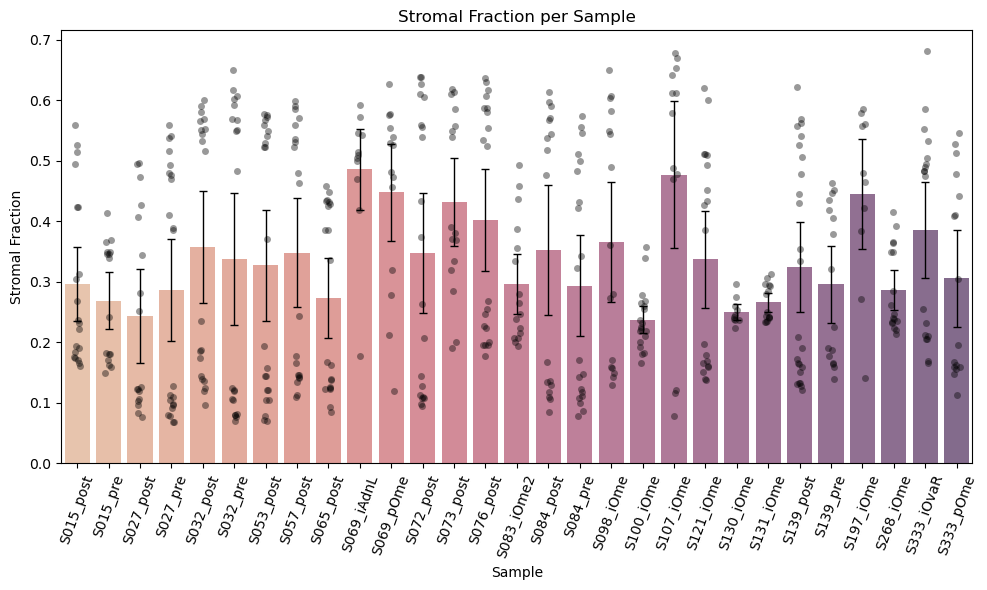

In [31]:
grouped=fibroblasts_proportion.groupby("Sample")["All Stromal"]
# Create a new DataFrame with the mean and variance of the stromal cells proportion
stromal_stats_sample = grouped.agg(["mean", "var", "count"]).reset_index()
#calculate the standard deviation, standard error of the mean, 95% confidence interval
stromal_stats_sample["std"] = np.sqrt(stromal_stats_sample["var"])
stromal_stats_sample["sem"]=stromal_stats_sample["std"] / np.sqrt(stromal_stats_sample["count"])
stromal_stats_sample["ci95"]=1.96*stromal_stats_sample["sem"]
plt.figure(figsize=(10, 6))
sns.barplot(x="Sample", y="mean", data=stromal_stats_sample,palette="flare",alpha=0.7)
plt.errorbar(
    x=np.arange(len(stromal_stats_sample)),  # x positions
    y=stromal_stats_sample["mean"],
    yerr=stromal_stats_sample["ci95"],
    fmt='none',
    ecolor='black',
    capsize=3,
    linewidth=1.0
)
sns.stripplot(
    x="Sample",
    y="All Stromal",
    data=fibroblasts_proportion,
    color='black',
    alpha=0.4,
    jitter=True  # spreads points horizontally for visibility
)
plt.xticks(rotation=70)
plt.xlabel("Sample")
plt.ylabel("Stromal Fraction")
plt.title("Stromal Fraction per Sample")
plt.tight_layout()

In [26]:
stromal_data = fibroblasts_proportion[fibroblasts_proportion["Segment"] == "stroma"]
tumor_data = fibroblasts_proportion[fibroblasts_proportion["Segment"] == "tumor"]

# Group and compute stats for stromal
grouped_stromal = stromal_data.groupby("Sample")["All Stromal"]
stromal_stats_sample_str = grouped_stromal.agg(["mean", "var", "count"]).reset_index()
stromal_stats_sample_str["std"] = np.sqrt(stromal_stats_sample_str["var"])
stromal_stats_sample_str["sem"] = stromal_stats_sample_str["std"] / np.sqrt(stromal_stats_sample_str["count"])
stromal_stats_sample_str["ci95"] = 1.96 * stromal_stats_sample_str["sem"]

# Group and compute stats for tumor
grouped_tumor = tumor_data.groupby("Sample")["All Stromal"]
tumor_stats_sample_tum = grouped_tumor.agg(["mean", "var", "count"]).reset_index()
tumor_stats_sample_tum["std"] = np.sqrt(tumor_stats_sample_tum["var"])
tumor_stats_sample_tum["sem"] = tumor_stats_sample_tum["std"] / np.sqrt(tumor_stats_sample_tum["count"])
tumor_stats_sample_tum["ci95"] = 1.96 * tumor_stats_sample_tum["sem"]

/var/folders/5f/jg_zhw0n3xl1tf79w0wk705r0000gn/T/ipykernel_2793/1974672721.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sample", y="mean", data=stromal_stats_sample_str,palette="flare",alpha=0.7,ax=ax2)
/var/folders/5f/jg_zhw0n3xl1tf79w0wk705r0000gn/T/ipykernel_2793/1974672721.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sample", y="mean", data=tumor_stats_sample_tum,palette="flare",alpha=0.7,ax=ax3)


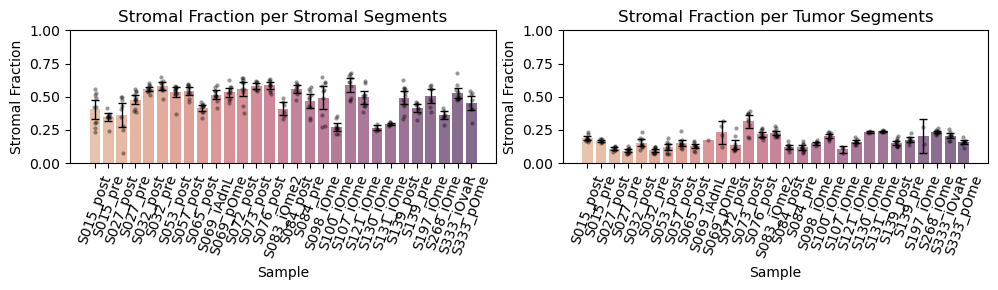

In [30]:
"""

grouped=fibroblasts_proportion.groupby("Sample")["tumor"]
tumor_stats_sample = grouped.agg(["mean", "var", "count"]).reset_index()
tumor_stats_sample["std"] = np.sqrt(tumor_stats_sample["var"])
tumor_stats_sample["sem"]=tumor_stats_sample["std"] / np.sqrt(tumor_stats_sample["count"])
tumor_stats_sample["ci95"]=1.96*tumor_stats_sample["sem"]
fig,(ax2,ax3)=plt.subplots(1,2,figsize=(10, 3))

"""
fig,(ax2,ax3)=plt.subplots(1,2,figsize=(10, 3))
sns.barplot(x="Sample", y="mean", data=stromal_stats_sample_str,palette="flare",alpha=0.7,ax=ax2)
sns.stripplot(x="Sample", y="All Stromal", data=stromal_data, color='black', size=3,alpha=0.4, jitter=True, ax=ax2)
ax2.errorbar(
    x=np.arange(len(stromal_stats_sample_str)),
    y=stromal_stats_sample_str["mean"],
    yerr=stromal_stats_sample_str["ci95"],
    fmt='none',
    ecolor='black',
    capsize=3,
    linewidth=1.0
)
ax2.set_ylim(0, 1)
#ax2.set_xlabel("Sample")
ax2.set_ylabel("Stromal Fraction")
ax2.set_title("Stromal Fraction per Stromal Segments")

ax2.set_xticks(np.arange(len(stromal_stats_sample_str)))
ax2.set_xticklabels(stromal_stats_sample_str["Sample"], rotation=70)

sns.barplot(x="Sample", y="mean", data=tumor_stats_sample_tum,palette="flare",alpha=0.7,ax=ax3)
sns.stripplot(x="Sample", y="All Stromal", data=tumor_data, color='black', size=3,alpha=0.4, jitter=True, ax=ax3)
ax3.errorbar(
    x=np.arange(len(tumor_stats_sample_tum)),
    y=tumor_stats_sample_tum["mean"],
    yerr=tumor_stats_sample_tum["ci95"],
    fmt='none',
    ecolor='black',
    capsize=3,
    linewidth=1.0
)
ax3.set_ylim(0, 1)
ax3.set_xlabel("Sample")
ax3.set_ylabel("Stromal Fraction")
ax3.set_title("Stromal Fraction per Tumor Segments")

ax3.set_xticks(np.arange(len(tumor_stats_sample_tum)))
ax3.set_xticklabels(tumor_stats_sample_tum["Sample"], rotation=70)
plt.tight_layout()

In [32]:
stromal_data = fibroblasts_proportion[fibroblasts_proportion["Segment"] == "stroma"]
tumor_data = fibroblasts_proportion[fibroblasts_proportion["Segment"] == "tumor"]

# Group and compute stats for fibroblasts in stroma

grouped_stromal_fibroblasts = stromal_data.groupby("Sample")["Fibroblasts"]
stromal_stats_sample_fibr = grouped_stromal_fibroblasts.agg(["mean", "var", "count"]).reset_index()
stromal_stats_sample_fibr["std"] = np.sqrt(stromal_stats_sample_fibr["var"])
stromal_stats_sample_fibr["sem"] = stromal_stats_sample_fibr["std"] / np.sqrt(stromal_stats_sample_fibr["count"])
stromal_stats_sample_fibr["ci95"] = 1.96 * stromal_stats_sample_fibr["sem"]

# Group and compute stats for fibroblasts in tumor
grouped_tumor_fibroblasts = tumor_data.groupby("Sample")["Fibroblasts"]
tumor_stats_sample_fibr = grouped_tumor_fibroblasts.agg(["mean", "var", "count"]).reset_index()
tumor_stats_sample_fibr["std"] = np.sqrt(tumor_stats_sample_fibr["var"])
tumor_stats_sample_fibr["sem"] = tumor_stats_sample_fibr["std"] / np.sqrt(tumor_stats_sample_fibr["count"])
tumor_stats_sample_fibr["ci95"] = 1.96 * tumor_stats_sample_fibr["sem"]

/var/folders/5f/jg_zhw0n3xl1tf79w0wk705r0000gn/T/ipykernel_2793/941404622.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sample", y="mean", data=stromal_stats_sample_fibr,palette="flare",alpha=0.7,ax=ax2)
/var/folders/5f/jg_zhw0n3xl1tf79w0wk705r0000gn/T/ipykernel_2793/941404622.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sample", y="mean", data=tumor_stats_sample_fibr,palette="flare",alpha=0.7,ax=ax3)


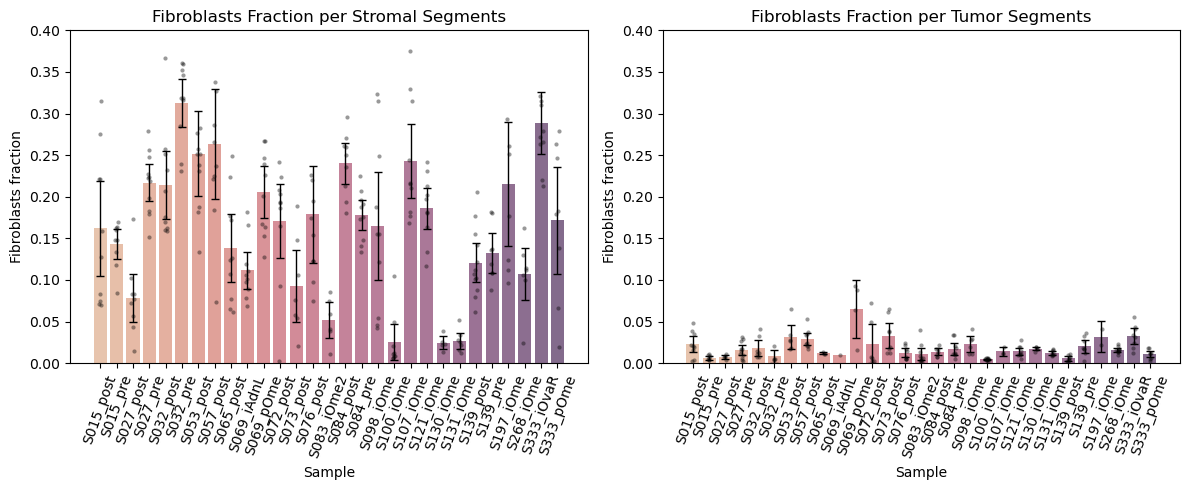

In [37]:
fig,(ax2,ax3)=plt.subplots(1,2,figsize=(12, 5))


sns.barplot(x="Sample", y="mean", data=stromal_stats_sample_fibr,palette="flare",alpha=0.7,ax=ax2)
sns.stripplot(x="Sample", y="Fibroblasts", data=stromal_data, color='black', size=3,alpha=0.4, jitter=True, ax=ax2)
ax2.errorbar(
    x=np.arange(len(stromal_stats_sample_fibr)),
    y=stromal_stats_sample_fibr["mean"],
    yerr=stromal_stats_sample_fibr["ci95"],
    fmt='none',
    ecolor='black',
    capsize=3,
    linewidth=1.0
)
ax2.set_ylim(0, 0.4)
#ax2.set_xlabel("Sample")
ax2.set_ylabel("Fibroblasts fraction")
ax2.set_title("Fibroblasts Fraction per Stromal Segments")

ax2.set_xticks(np.arange(len(stromal_stats_sample_fibr)))
ax2.set_xticklabels(stromal_stats_sample_fibr["Sample"], rotation=70)

sns.barplot(x="Sample", y="mean", data=tumor_stats_sample_fibr,palette="flare",alpha=0.7,ax=ax3)
sns.stripplot(x="Sample", y="Fibroblasts", data=tumor_data, color='black', size=3,alpha=0.4, jitter=True, ax=ax3)
ax3.errorbar(
    x=np.arange(len(tumor_stats_sample_fibr)),
    y=tumor_stats_sample_fibr["mean"],
    yerr=tumor_stats_sample_fibr["ci95"],
    fmt='none',
    ecolor='black',
    capsize=3,
    linewidth=1.0
)
ax3.set_ylim(0, 0.4)
ax3.set_xlabel("Sample")
ax3.set_ylabel("Fibroblasts fraction")
ax3.set_title("Fibroblasts Fraction per Tumor Segments")

ax3.set_xticks(np.arange(len(tumor_stats_sample_fibr)))
ax3.set_xticklabels(tumor_stats_sample_fibr["Sample"], rotation=70)
plt.tight_layout()

Computing cell proportions in stromal segments

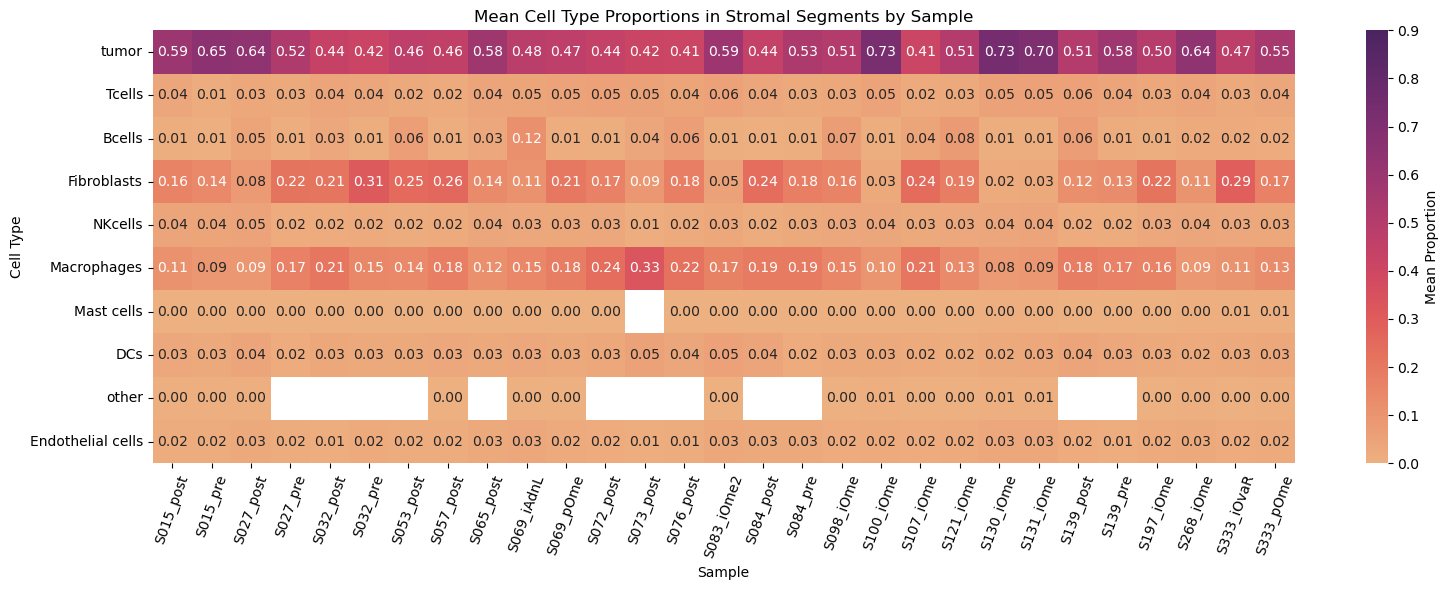

In [9]:
cell_types=["tumor",'Tcells', 'Bcells', 'Fibroblasts', 'NKcells',
              'Macrophages', 'Mast cells', 'DCs', 'other', 'Endothelial cells']

stromal_heatmap_data = stromal_data.groupby("Sample")[cell_types].mean().T

plt.figure(figsize=(16, 6))
sns.heatmap(stromal_heatmap_data, cmap="flare", annot=True, fmt=".2f", vmin=0,vmax=0.9,cbar_kws={'label': 'Mean Proportion'})
plt.title("Mean Cell Type Proportions in Stromal Segments by Sample")
plt.xlabel("Sample")
plt.xticks(rotation=70)
plt.ylabel("Cell Type")
plt.tight_layout()
plt.show()

Tumor cells log transformed, scale same as with tumor segments

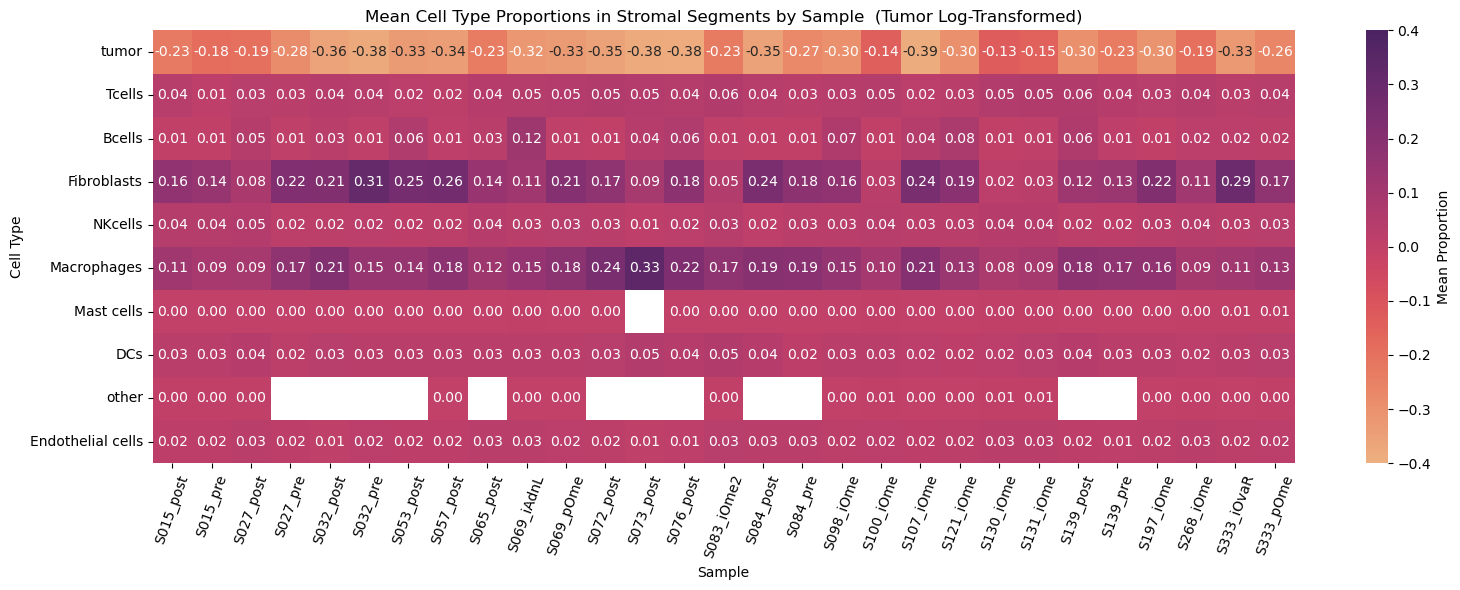

In [10]:
stromal_heatmap_data_copy=stromal_heatmap_data.copy()
stromal_heatmap_data_copy.loc["tumor"]=np.log10(stromal_heatmap_data_copy.loc["tumor"])

plt.figure(figsize=(16, 6))
sns.heatmap(stromal_heatmap_data_copy, cmap="flare", annot=True, fmt=".2f", vmin=-0.4,vmax=0.4,cbar_kws={'label': 'Mean Proportion'})
plt.title("Mean Cell Type Proportions in Stromal Segments by Sample  (Tumor Log-Transformed)")
plt.xlabel("Sample")
plt.xticks(rotation=70)
plt.ylabel("Cell Type")
plt.tight_layout()
plt.show()

Computing cell proportions in tumor segments

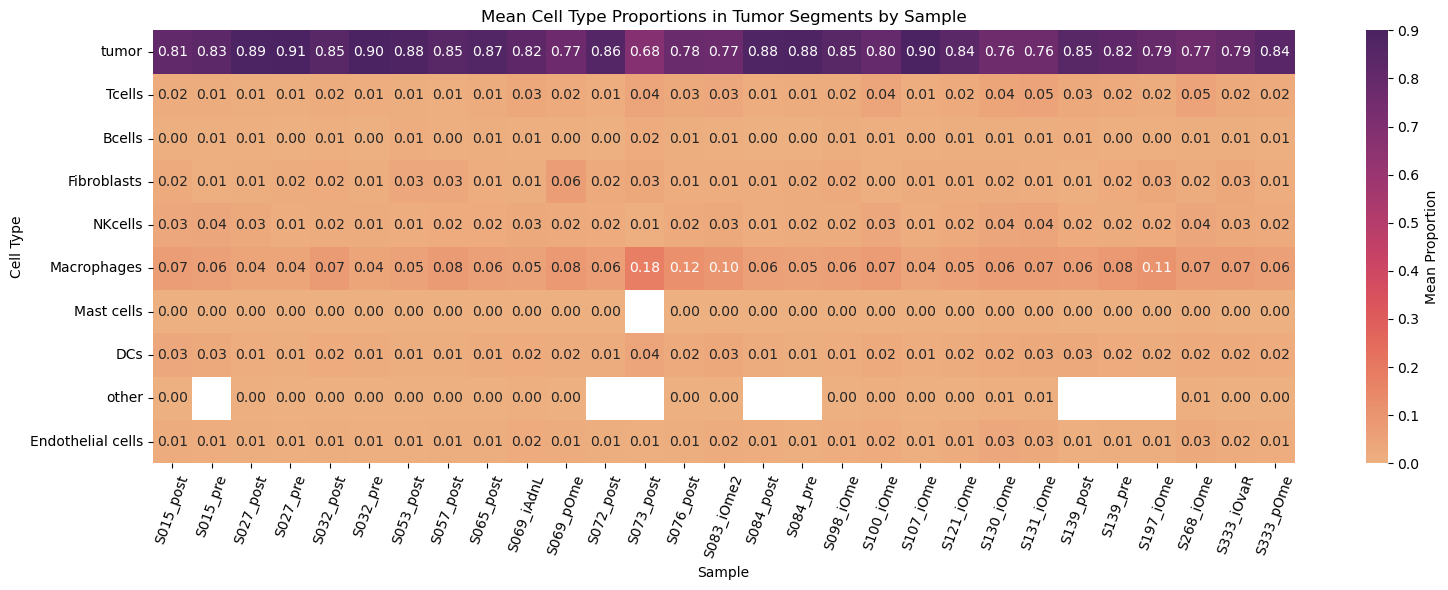

In [11]:
cell_types=cell_types = ["tumor",'Tcells', 'Bcells', 'Fibroblasts', 'NKcells',
              'Macrophages', 'Mast cells', 'DCs', 'other', 'Endothelial cells']

tumor_heatmap_data = tumor_data.groupby("Sample")[cell_types].mean().T

plt.figure(figsize=(16, 6))
sns.heatmap(tumor_heatmap_data, cmap="flare", annot=True, fmt=".2f",vmin=0,vmax=0.9, cbar_kws={'label': 'Mean Proportion'})
plt.title("Mean Cell Type Proportions in Tumor Segments by Sample")
plt.xlabel("Sample")
plt.xticks(rotation=70)
plt.ylabel("Cell Type")
plt.tight_layout()
plt.show()

In [11]:
tumor_heatmap_data

Sample,S015_post,S015_pre,S027_post,S027_pre,S032_post,S032_pre,S053_post,S057_post,S065_post,S069_iAdnL,...,S107_iOme,S121_iOme,S130_iOme,S131_iOme,S139_post,S139_pre,S197_iOme,S268_iOme,S333_iOvaR,S333_pOme
tumor,0.812631,0.831037,0.889951,0.905994,0.846132,0.903910,0.881289,0.848039,0.871774,0.823338,...,0.895054,0.837826,0.764404,0.759920,0.845659,0.823839,0.793925,0.765315,0.793382,0.842778
Tcells,0.015800,0.014480,0.008583,0.007198,0.016248,0.011784,0.007309,0.006695,0.014834,0.034565,...,0.012292,0.023395,0.044618,0.046743,0.027604,0.024554,0.017185,0.048087,0.024693,0.023155
Bcells,0.004419,0.006001,0.006166,0.001990,0.005257,0.002724,0.010727,0.004427,0.007785,0.006303,...,0.004185,0.010538,0.008334,0.009087,0.011664,0.004920,0.003602,0.008817,0.007519,0.005941
Fibroblasts,0.022892,0.006652,0.007635,0.015451,0.018285,0.008446,0.031421,0.029410,0.011777,0.009432,...,0.014286,0.014263,0.017533,0.012197,0.005687,0.020491,0.032032,0.015940,0.032623,0.010787
NKcells,0.031395,0.037402,0.026399,0.013059,0.017201,0.014555,0.013951,0.017887,0.020147,0.027992,...,0.013295,0.023285,0.038655,0.038839,0.017907,0.016374,0.019072,0.036719,0.027983,0.022951
Macrophages,0.067735,0.058552,0.042673,0.043126,0.074215,0.042970,0.052316,0.076127,0.057254,0.050779,...,0.041277,0.054855,0.063536,0.069327,0.061860,0.081119,0.105804,0.066750,0.068227,0.058660
Mast cells,0.001853,0.002431,0.001150,0.000665,0.001159,0.000764,0.000916,0.001098,0.001201,0.003137,...,0.000981,0.001795,0.004501,0.004642,0.000582,0.000617,0.001200,0.003948,0.002983,0.002703
DCs,0.029064,0.028045,0.013370,0.007117,0.018475,0.014818,0.009767,0.010371,0.014923,0.020241,...,0.010894,0.017212,0.023446,0.026982,0.025077,0.020081,0.016289,0.022718,0.023238,0.019148
other,0.002915,NaN,0.004431,0.000591,0.000700,0.001171,0.000794,0.000772,0.001098,0.004361,...,0.002173,0.002593,0.005980,0.005766,NaN,NaN,NaN,0.005176,0.002968,0.001873
Endothelial cells,0.014070,0.013040,0.007223,0.005228,0.007967,0.005128,0.005926,0.008296,0.007644,0.019852,...,0.006118,0.014169,0.028993,0.026496,0.005642,0.007811,0.009983,0.026530,0.017109,0.012108


Tumor cells log transformed, the scale auto-adjusted

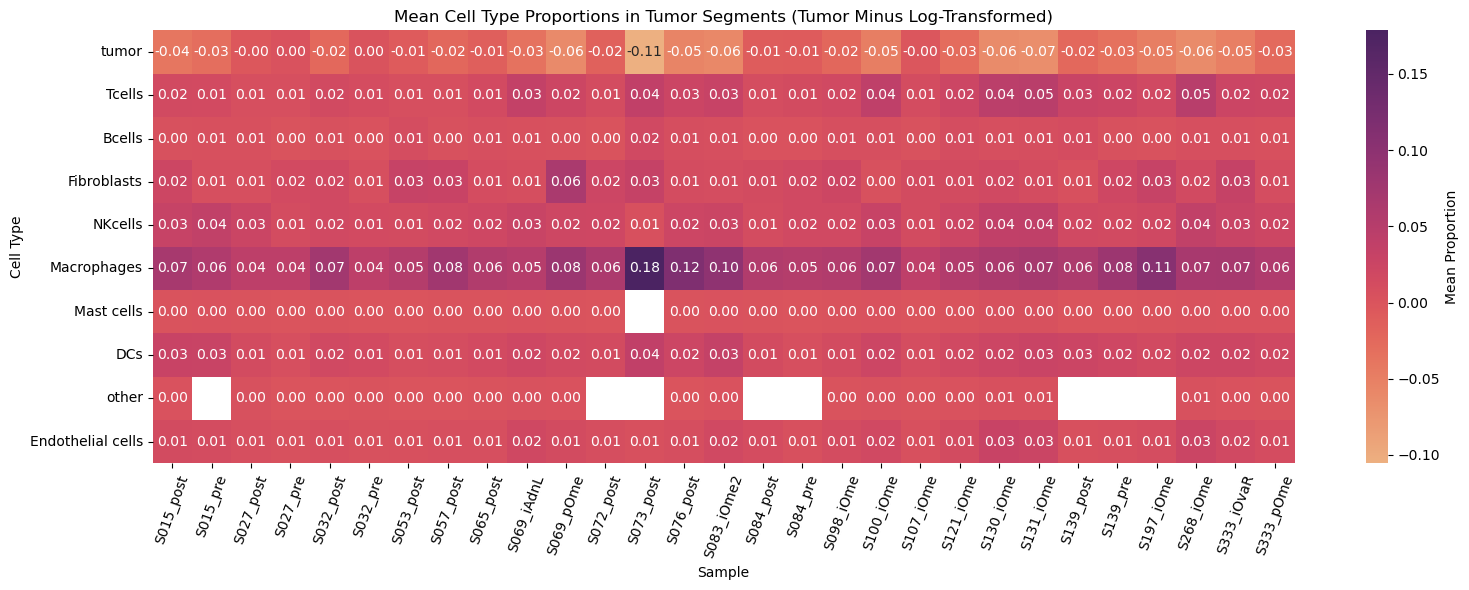

In [12]:
tumor_heatmap_data_copy=tumor_heatmap_data.copy()
pseudo_count=0.1
tumor_heatmap_data_copy.loc["tumor"]=np.log10(tumor_heatmap_data_copy.loc["tumor"]+pseudo_count)

plt.figure(figsize=(16, 6))
sns.heatmap(tumor_heatmap_data_copy, cmap="flare", annot=True, fmt=".2f",cbar_kws={'label': 'Mean Proportion'})
plt.title("Mean Cell Type Proportions in Tumor Segments (Tumor Minus Log-Transformed)")
plt.xlabel("Sample")
plt.xticks(rotation=70)
plt.ylabel("Cell Type")
plt.tight_layout()
plt.show()


Tumor cell amount log transformed , scale same as with stromal segments

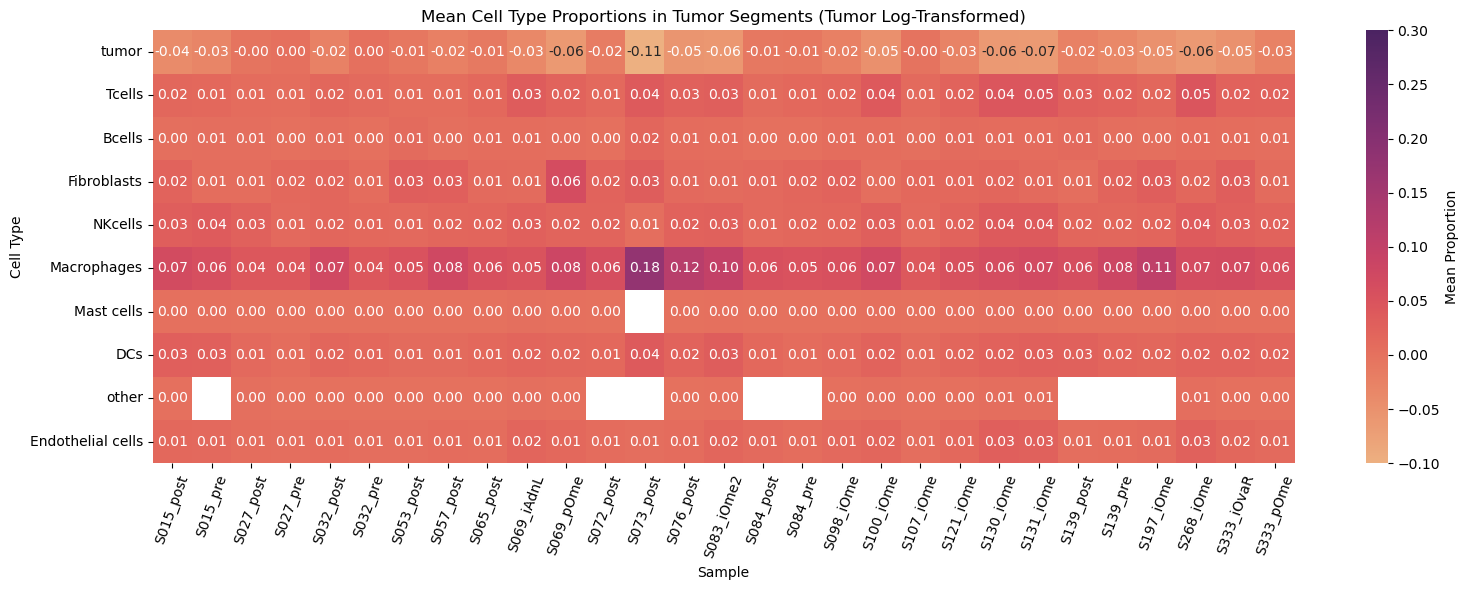

In [13]:
tumor_heatmap_data_copy=tumor_heatmap_data.copy()
pseudo_count=0.1
tumor_heatmap_data_copy.loc["tumor"]=np.log10(tumor_heatmap_data_copy.loc["tumor"]+pseudo_count)

plt.figure(figsize=(16, 6))
sns.heatmap(tumor_heatmap_data_copy, cmap="flare", annot=True, fmt=".2f",vmin=-0.1,vmax=0.3,cbar_kws={'label': 'Mean Proportion'})
plt.title("Mean Cell Type Proportions in Tumor Segments (Tumor Log-Transformed)")
plt.xlabel("Sample")
plt.xticks(rotation=70)
plt.ylabel("Cell Type")
plt.tight_layout()
plt.show()

Barplot of cells proportions in stromal and tumor segments per sample

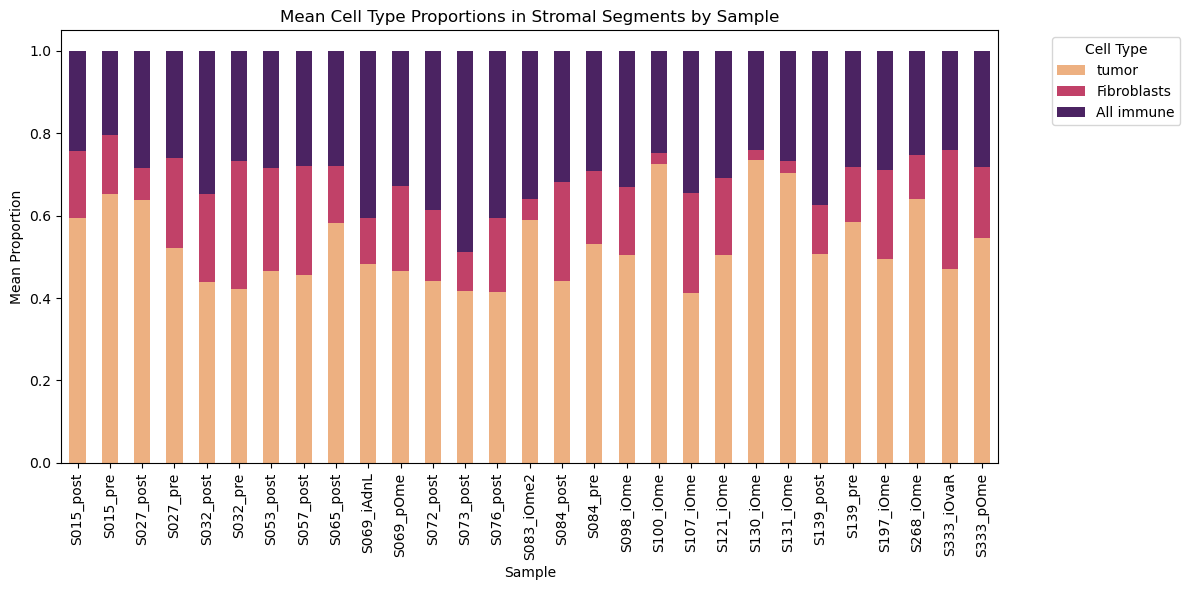

In [14]:
cell_types=["tumor",'Fibroblasts', 'All immune']

stromal_barplot_data = stromal_data.groupby("Sample")[cell_types].mean()

ax = stromal_barplot_data.plot(kind='bar', stacked=True, figsize=(12, 6),cmap="flare")

plt.title('Mean Cell Type Proportions in Stromal Segments by Sample')
plt.xlabel('Sample')
plt.ylabel('Mean Proportion')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

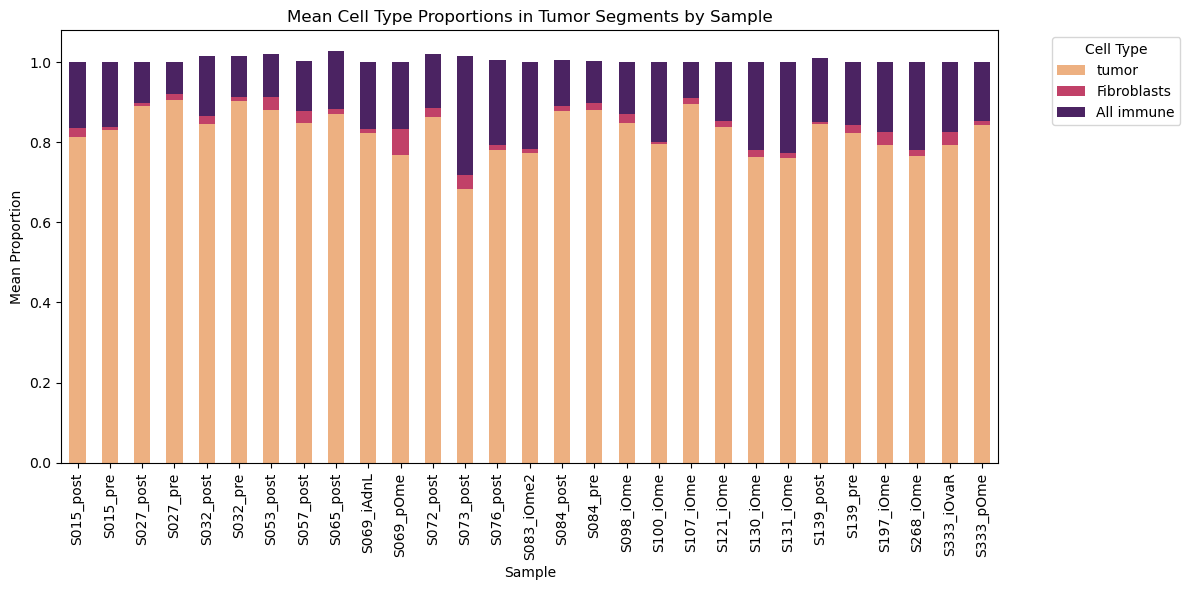

In [15]:
cell_types=["tumor",'Fibroblasts', 'All immune']

tumor_barplot_data = tumor_data.groupby("Sample")[cell_types].mean()

ax = tumor_barplot_data.plot(kind='bar', stacked=True, figsize=(12, 6),cmap="flare")

plt.title('Mean Cell Type Proportions in Tumor Segments by Sample')
plt.xlabel('Sample')
plt.ylabel('Mean Proportion')
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Violin plots of cells amount per sample

/var/folders/5f/jg_zhw0n3xl1tf79w0wk705r0000gn/T/ipykernel_2793/2641523411.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=stromal_data_melted, x="Cell Type", y="Proportion", palette="flare", alpha=0.7)
/var/folders/5f/jg_zhw0n3xl1tf79w0wk705r0000gn/T/ipykernel_2793/2641523411.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=tumor_data_melted, x="Cell Type", y="Proportion", palette="flare", alpha=0.7)


'\nplt.figure(figsize=(6, 4))\nplt.title("Tumor cells proportion in tumor and stroma segments")\nplt.ylabel("Tumor cells proportion")\nsns.violinplot(data=fibroblasts_proportion, x=\'Segment\', y=\'tumor\', palette=\'cool\',alpha=0.7)\nsns.stripplot(data=fibroblasts_proportion, x=\'Segment\', y=\'tumor\', color=\'black\', alpha=0.3, jitter=True, size=5)\n'

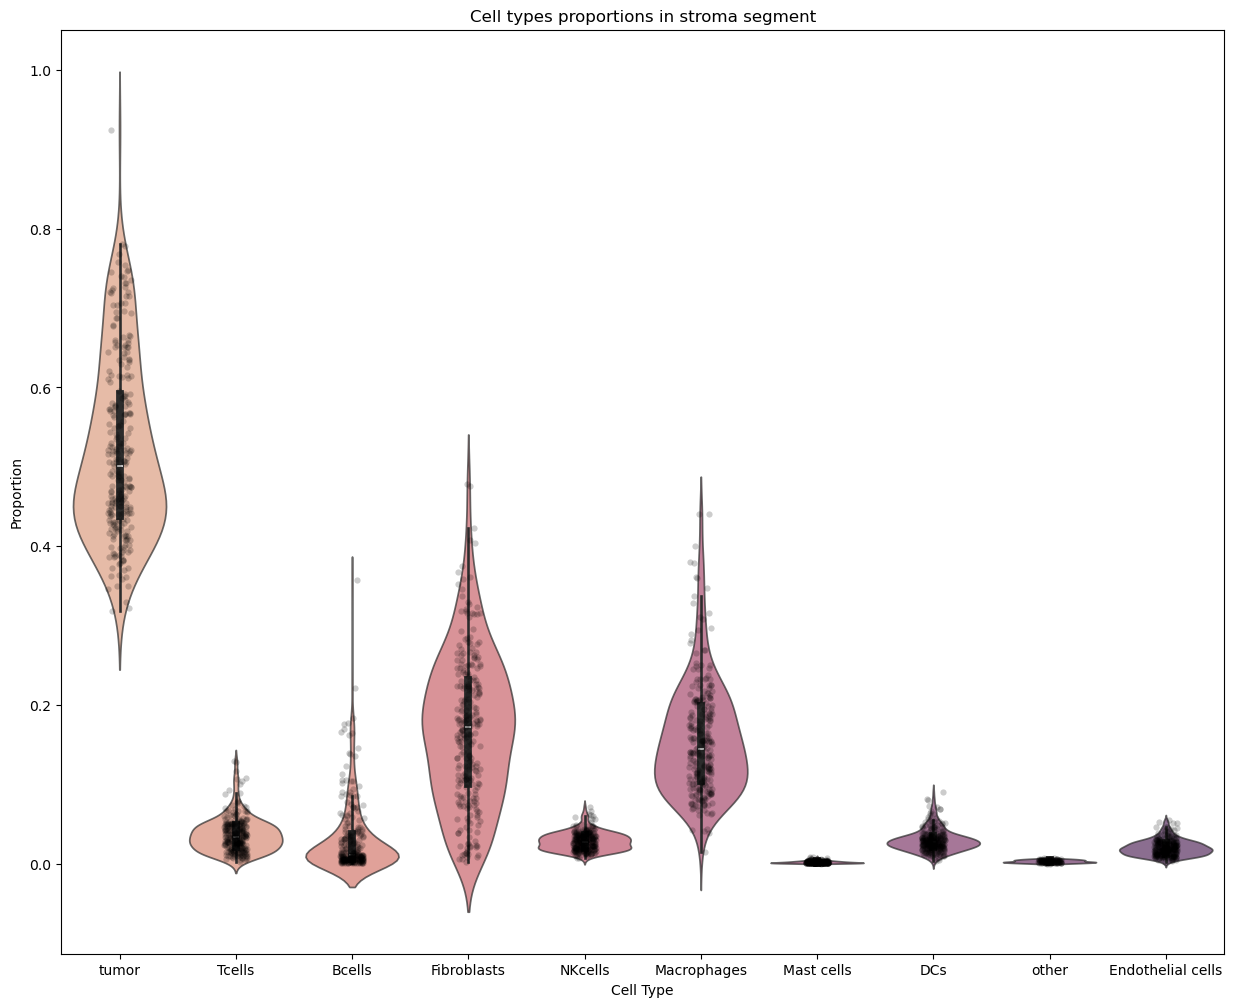

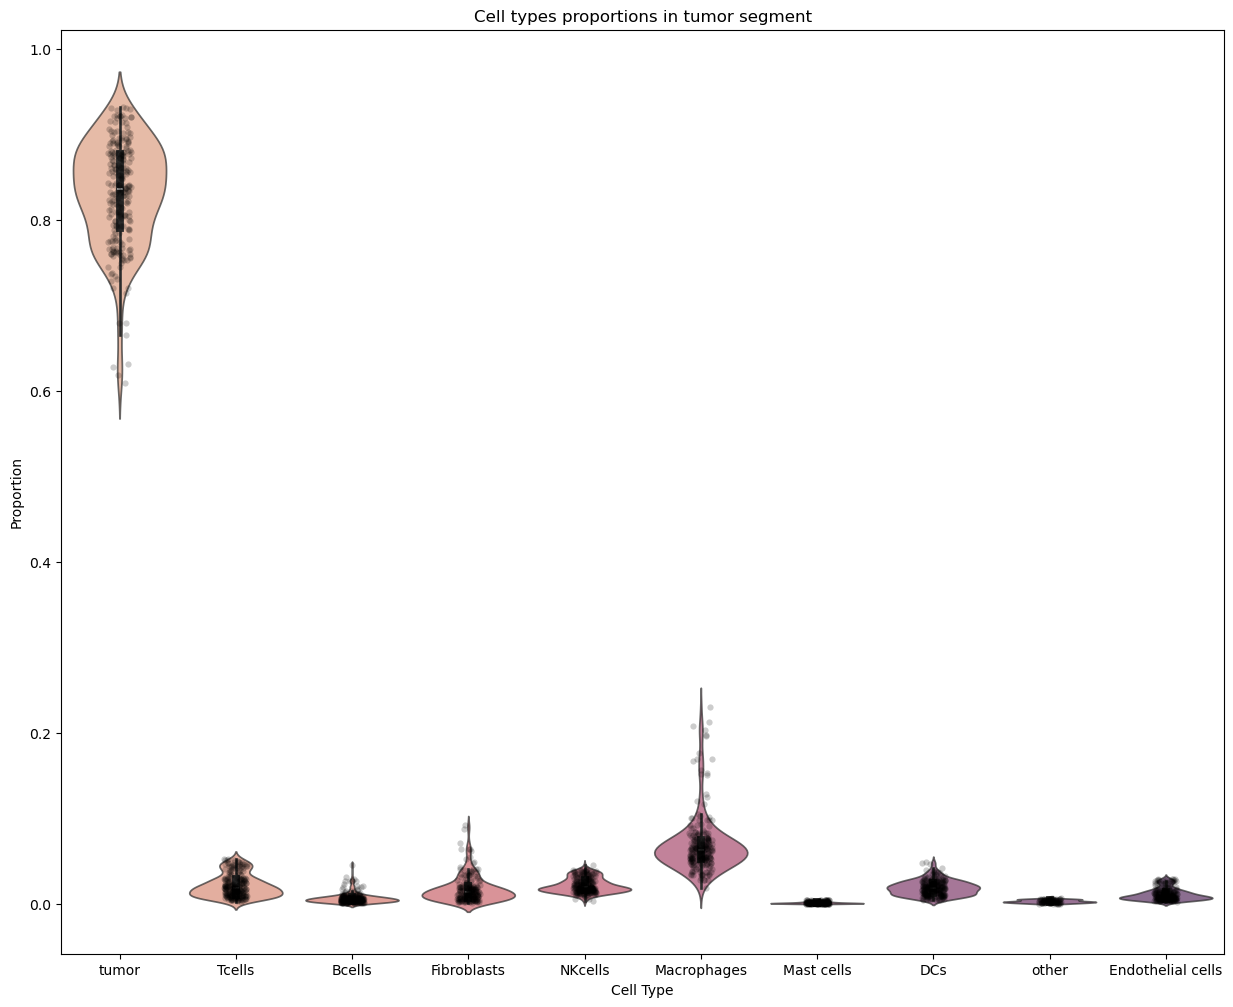

In [16]:

cell_types = ["tumor",'Tcells', 'Bcells', 'Fibroblasts', 'NKcells',
              'Macrophages', 'Mast cells', 'DCs', 'other', 'Endothelial cells']
stromal_data_melted = stromal_data[cell_types].melt(var_name="Cell Type", value_name="Proportion")

tumor_data_melted =tumor_data[cell_types].melt(var_name="Cell Type", value_name="Proportion")


plt.figure(figsize=(15, 12))
plt.title("Cell types proportions in stroma segment")
plt.ylabel("Proportion")
sns.violinplot(data=stromal_data_melted, x="Cell Type", y="Proportion", palette="flare", alpha=0.7)
sns.stripplot(data=stromal_data_melted, x="Cell Type", y="Proportion", color='black', alpha=0.2, jitter=True, size=4.5)

plt.figure(figsize=(15, 12))
plt.title("Cell types proportions in tumor segment")
plt.ylabel("Proportion")
sns.violinplot(data=tumor_data_melted, x="Cell Type", y="Proportion", palette="flare", alpha=0.7)
sns.stripplot(data=tumor_data_melted, x="Cell Type", y="Proportion", color='black', alpha=0.2, jitter=True, size=4.5)
#sns.stripplot(data=fibroblasts_proportion, x='Segment', y='Fibroblasts', color='black', alpha=0.6, jitter=False, size=4)
"""
plt.figure(figsize=(6, 4))
plt.title("Tumor cells proportion in tumor and stroma segments")
plt.ylabel("Tumor cells proportion")
sns.violinplot(data=fibroblasts_proportion, x='Segment', y='tumor', palette='cool',alpha=0.7)
sns.stripplot(data=fibroblasts_proportion, x='Segment', y='tumor', color='black', alpha=0.3, jitter=True, size=5)
"""

/var/folders/5f/jg_zhw0n3xl1tf79w0wk705r0000gn/T/ipykernel_2793/2906839595.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=stromal_data_melted, x="Cell Type", y="Proportion", palette="flare", alpha=0.7)
/var/folders/5f/jg_zhw0n3xl1tf79w0wk705r0000gn/T/ipykernel_2793/2906839595.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=tumor_data_melted, x="Cell Type", y="Proportion", palette="flare", alpha=0.7)


'\nplt.figure(figsize=(6, 4))\nplt.title("Tumor cells proportion in tumor and stroma segments")\nplt.ylabel("Tumor cells proportion")\nsns.violinplot(data=fibroblasts_proportion, x=\'Segment\', y=\'tumor\', palette=\'cool\',alpha=0.7)\nsns.stripplot(data=fibroblasts_proportion, x=\'Segment\', y=\'tumor\', color=\'black\', alpha=0.3, jitter=True, size=5)\n'

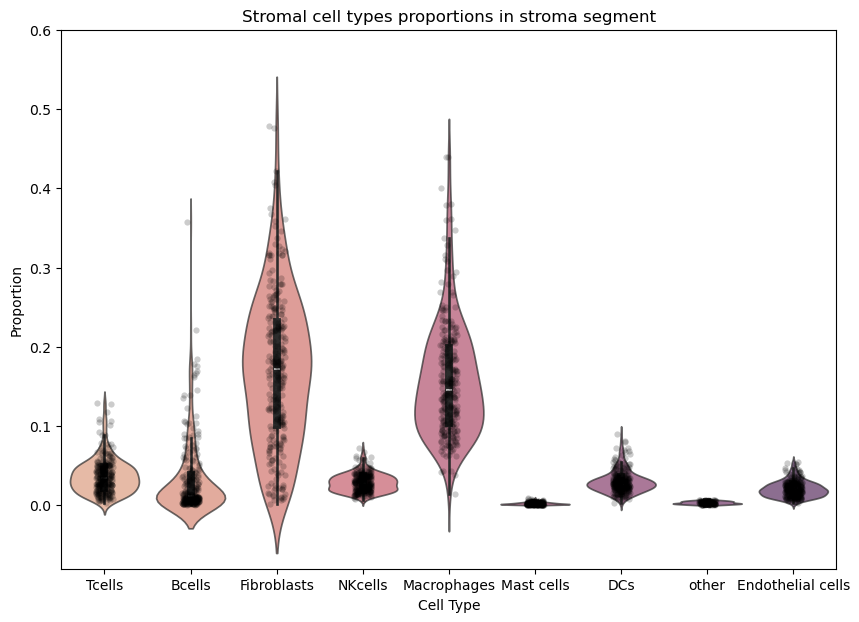

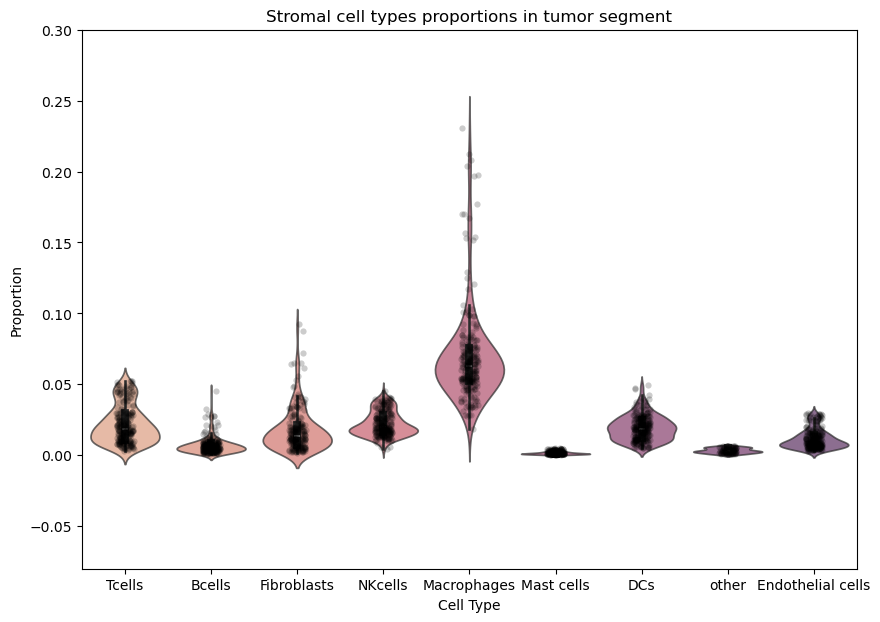

In [18]:

cell_types = ['Tcells', 'Bcells', 'Fibroblasts', 'NKcells',
              'Macrophages', 'Mast cells', 'DCs', 'other', 'Endothelial cells']
stromal_data_melted = stromal_data[cell_types].melt(var_name="Cell Type", value_name="Proportion")

tumor_data_melted =tumor_data[cell_types].melt(var_name="Cell Type", value_name="Proportion")


plt.figure(figsize=(10,7))
plt.title("Stromal cell types proportions in stroma segment")
plt.ylabel("Proportion")
sns.violinplot(data=stromal_data_melted, x="Cell Type", y="Proportion", palette="flare", alpha=0.7)
sns.stripplot(data=stromal_data_melted, x="Cell Type", y="Proportion", color='black', alpha=0.2, jitter=True, size=4.5)
plt.ylim(-0.08, 0.6)


plt.figure(figsize=(10, 7))
plt.title("Stromal cell types proportions in tumor segment")
plt.ylabel("Proportion")
sns.violinplot(data=tumor_data_melted, x="Cell Type", y="Proportion", palette="flare", alpha=0.7)
sns.stripplot(data=tumor_data_melted, x="Cell Type", y="Proportion", color='black', alpha=0.2, jitter=True, size=4.5)
plt.ylim(-0.08, 0.3)
#sns.stripplot(data=fibroblasts_proportion, x='Segment', y='Fibroblasts', color='black', alpha=0.6, jitter=False, size=4)
"""
plt.figure(figsize=(6, 4))
plt.title("Tumor cells proportion in tumor and stroma segments")
plt.ylabel("Tumor cells proportion")
sns.violinplot(data=fibroblasts_proportion, x='Segment', y='tumor', palette='cool',alpha=0.7)
sns.stripplot(data=fibroblasts_proportion, x='Segment', y='tumor', color='black', alpha=0.3, jitter=True, size=5)
"""

In [45]:
stromal_data_melted

,Cell Type,Proportion
0,dcc_filename,DSP-1001660016606-G-A02.dcc
1,dcc_filename,DSP-1001660016606-G-A04.dcc
2,dcc_filename,DSP-1001660016606-G-A06.dcc
3,dcc_filename,DSP-1001660016606-G-A08.dcc
4,dcc_filename,DSP-1001660016606-G-A10.dcc
...,...,...
5847,All immune,0.265353
5848,All immune,0.374956
5849,All immune,0.267166
5850,All immune,0.229539
